In [2]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

## Tennis Exploration Project 
## Part 1: Win Percentage (%)

In [3]:
atp = pd.read_csv('atp.csv')
atp = atp[atp['TourRank'] <= 5]

In [4]:
min_age = min(atp['Age_CUR_1'])
max_age = max(atp['Age_CUR_1'])
print([min_age, max_age])

[14.01917808, 59.7890411]


In [5]:
# Helper function for later use
def avg_win_percentage(age_lower_bound, age_upper_bound):
    age_range = atp[(atp['Age_CUR_1'] >= age_lower_bound) & (atp['Age_CUR_1'] < age_upper_bound)]
    if age_range.shape[0] == 0:
        return 0.0 
    sum_wins = 0
    for index, row in age_range.iterrows():
        if row['GRes_1'] == 1:
            sum_wins += 1
    percentage = sum_wins / age_range.shape[0]
    return percentage

## General Distribution of Win Percentage for different Age Brackets
Here we begin by observing the distribution of the winning percentages of male tennis players across all tennis surfaces.

In [6]:
# Define the age brackets
age_brackets = [(12.5, 16), (16, 19), (19, 22), (22, 25), (25, 28), (28, 31),
                (31, 34), (34, 37), (37, 40), (40, 43), (43, 46)]

win_percentages = [avg_win_percentage(age[0], age[1]) for age in age_brackets]
print(win_percentages)

[0.21052631578947367, 0.38121840915137006, 0.4769597457627119, 0.5175641321932054, 0.5416131668028481, 0.5424795468848332, 0.5292918057100482, 0.5325172149961744, 0.35714285714285715, 0.058823529411764705, 0.10526315789473684]


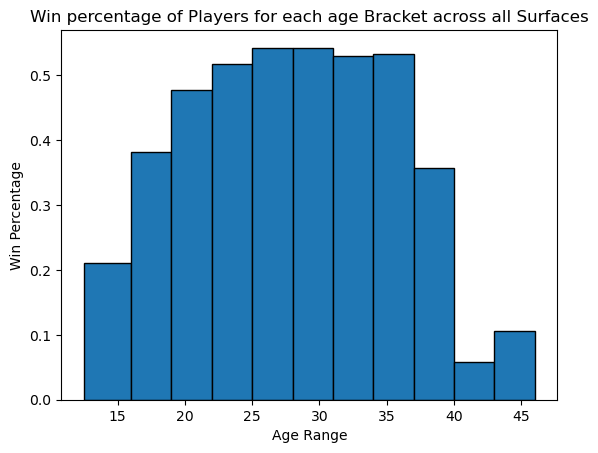

In [7]:
bins = np.array([12.5, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])
y_values = win_percentages

# Calculate bin widths to create the bars
bin_widths = bins[1:] - bins[:-1]
bin_centers = (bins[:-1] + bins[1:]) / 2  # These are the midpoints for each bin

# Plot the y_values corresponding to each bin range
plt.bar(bin_centers, y_values, width=bin_widths, align='center', edgecolor='black')

plt.xlabel('Age Range')
plt.ylabel('Win Percentage')
plt.title('Win percentage of Players for each age Bracket across all Surfaces')

plt.show()

## Visualizing the Distributions of Winning Percentages for Male Tennis players across Clay, Grass, and Hardcourt surfaces

In [8]:
num_surfaces = atp['Surface'].unique()
surfaces = {1: 'Hard Outdoor',
            2: 'Indoor Clay',
            3: 'Hard Indoor',
            4: 'Outdoor Clay',
            5: 'Grass'
           } 

In [9]:
def surface_win_percentage(age_lower_bound, age_upper_bound, surface):
    age_range = atp[(atp['Age_CUR_1'] >= age_lower_bound) & (atp['Age_CUR_1'] < age_upper_bound)]
    age_range = age_range[age_range['Surface'] == surface]
    
    if age_range.shape[0] == 0:
        return 0.0
        
    sum_wins = 0
    for index, row in age_range.iterrows():
        if row['GRes_1'] == 1:
            sum_wins += 1
    percentage = sum_wins / age_range.shape[0]
    return percentage

## Hard Court (Outdoor): Win Percentage Distribution for Male Tennis Players

In [10]:
age_brackets = [(12.5, 16), (16, 19), (19, 22), (22, 25), (25, 28), (28, 31),
                (31, 34), (34, 37), (37, 40), (40, 43), (43, 46)]

surface1_data = [surface_win_percentage(age[0], age[1], 1) for age in age_brackets]
surface1_data

[0.2537313432835821,
 0.421195652173913,
 0.4696583375828659,
 0.5143659180977543,
 0.5512033195020747,
 0.5453867197214624,
 0.5138728323699422,
 0.5523809523809524,
 0.25,
 0.16666666666666666,
 0.0]

## Indoor Clay: Win Percentage Distribution for Male Tennis Players

In [11]:
age_brackets = [(12.5, 16), (16, 19), (19, 22), (22, 25), (25, 28), (28, 31),
                (31, 34), (34, 37), (37, 40), (40, 43), (43, 46)]

surface2_data = [surface_win_percentage(age[0], age[1], 2) for age in age_brackets]
surface2_data

[0.1875,
 0.356386292834891,
 0.4891766524932354,
 0.5286441341511158,
 0.5375431530494822,
 0.5418122525040764,
 0.5271178843567906,
 0.4990328820116054,
 0.4264705882352941,
 0.0,
 0.15384615384615385]

## Hard Court (Indoor): Win Percentage Distribution for Male Tennis Players

In [12]:
age_brackets = [(12.5, 16), (16, 19), (19, 22), (22, 25), (25, 28), (28, 31),
                (31, 34), (34, 37), (37, 40), (40, 43), (43, 46)]

surface3_data = [surface_win_percentage(age[0], age[1], 3) for age in age_brackets]
surface3_data

[0.14285714285714285,
 0.31736526946107785,
 0.4492939666238768,
 0.4992156862745098,
 0.5257839721254356,
 0.5234580917237743,
 0.5369807497467072,
 0.5384615384615384,
 0.3333333333333333,
 0.0,
 0.0]

## Outdoor Clay: Win Percentage Distribution for Male Tennis Players

In [13]:
age_brackets = [(12.5, 16), (16, 19), (19, 22), (22, 25), (25, 28), (28, 31),
                (31, 34), (34, 37), (37, 40), (40, 43), (43, 46)]

surface4_data = [surface_win_percentage(age[0], age[1], 4) for age in age_brackets]
surface4_data

[0.2,
 0.42990654205607476,
 0.5,
 0.4662756598240469,
 0.5727554179566563,
 0.6035502958579881,
 0.5352112676056338,
 0.6666666666666666,
 0.3333333333333333,
 0.0,
 0.0]

## Grass: Win Percentage Distribution for Male Tennis Players

In [14]:
age_brackets = [(12.5, 16), (16, 19), (19, 22), (22, 25), (25, 28), (28, 31),
                (31, 34), (34, 37), (37, 40), (40, 43), (43, 46)]

surface5_data = [surface_win_percentage(age[0], age[1], 5) for age in age_brackets]
surface5_data

[0.0,
 0.4864864864864865,
 0.4797687861271676,
 0.5157593123209169,
 0.5477178423236515,
 0.5652759084791387,
 0.592,
 0.575,
 0.5,
 0.0,
 0.0]

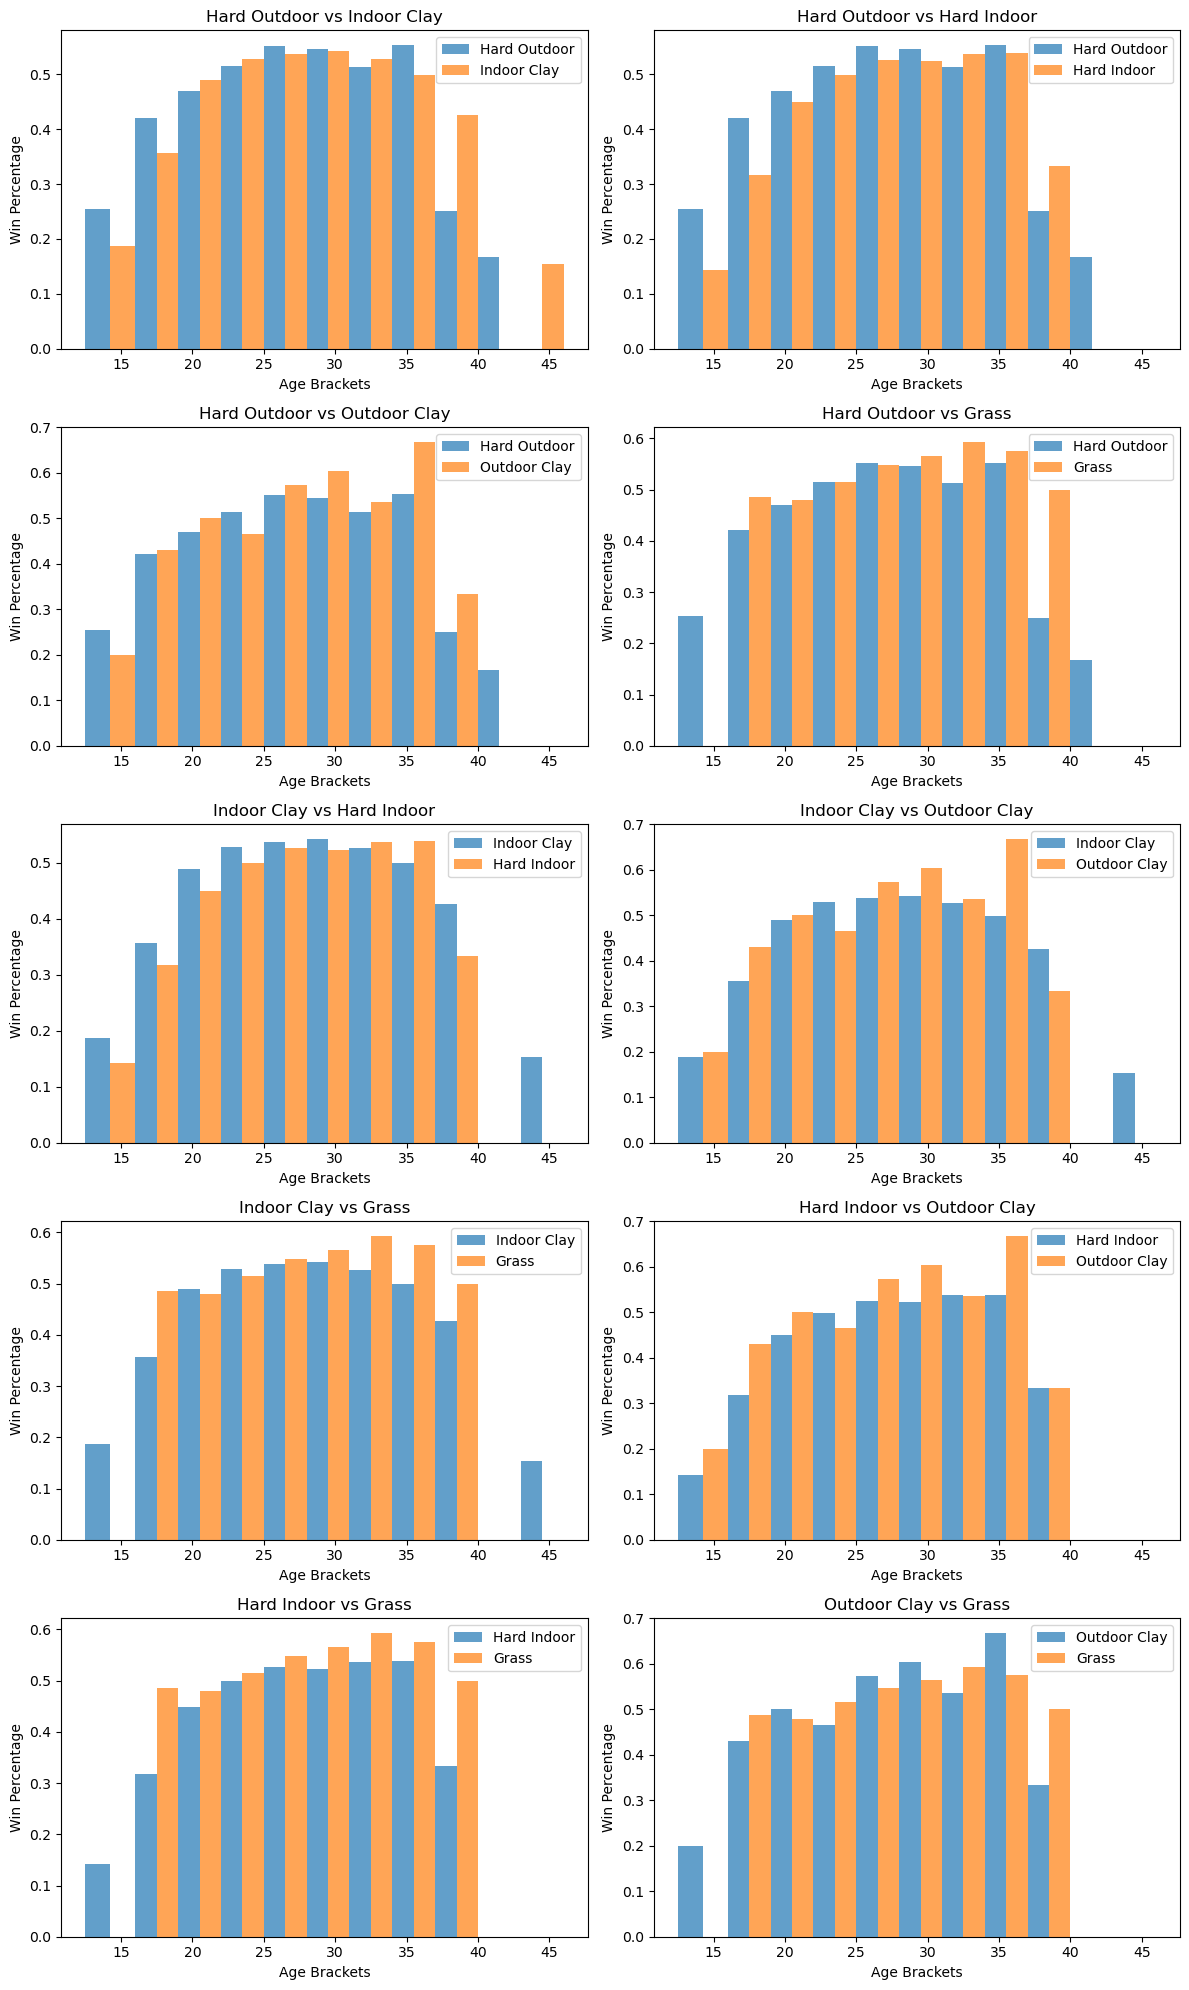

In [15]:
fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # 5 rows, 2 columns

bin_widths = bins[1:] - bins[:-1]
bin_centers = (bins[:-1] + bins[1:]) / 2

surface_pairs = [
    (surface1_data, surface2_data, 1, 2),
    (surface1_data, surface3_data, 1, 3),
    (surface1_data, surface4_data, 1, 4),
    (surface1_data, surface5_data, 1, 5),
    (surface2_data, surface3_data, 2, 3),
    (surface2_data, surface4_data, 2, 4),
    (surface2_data, surface5_data, 2, 5),
    (surface3_data, surface4_data, 3, 4),
    (surface3_data, surface5_data, 3, 5),
    (surface4_data, surface5_data, 4, 5)
]

# Offset amount for side-by-side bars
offset = bin_widths / 4

for i, (surface_a, surface_b, surface_num_a, surface_num_b) in enumerate(surface_pairs):
    row, col = divmod(i, 2)
    
    # Shift the bars for surface_a slightly to the left and for surface_b slightly to the right
    axes[row, col].bar(bin_centers - offset, surface_a, width=bin_widths / 2, alpha=0.7, label=surfaces[surface_num_a], align='center')
    axes[row, col].bar(bin_centers + offset, surface_b, width=bin_widths / 2, alpha=0.7, label=surfaces[surface_num_b], align='center')
    
    axes[row, col].set_xlabel('Age Brackets')
    axes[row, col].set_ylabel('Win Percentage')
    axes[row, col].set_title(f'{surfaces[surface_num_a]} vs {surfaces[surface_num_b]}')
    
    axes[row, col].legend()

plt.tight_layout()
plt.show()


## Takeaways

The side-by-side bar charts capture the win percentages for each age bracket across the different tennis surfaces, conveying how player performance varies with age and surface type. There is a consistent trend across the surfaces of increasing win percentages as players mature into their late 20s and early 30s, suggesting that this age range represents the peak performance period for most tennis players. For most surfaces, win percentages tend to peak around ages 25-35 before gradually declining.

Comparing surfaces, the graphs highlight how certain surfaces like Indoor Clay and Outdoor Clay exhibit comparatively high win percentages for older players (35+), while surfaces like Grass show sharper declines in win percentages for the same age groups. This could indicate that older players are better able to adapt to the slower-paced clay surfaces but struggle more on faster surfaces like grass. The Hard Indoor surface also shows a more consistent win percentage across different age brackets compared to others, indicating that player performance on this surface may be less sensitive to age.

## Part 2: Total Wins and Surface/Age Correlation

In [16]:
#Loading in additional data
wta = pd.read_csv('wta.csv')

In [17]:
#print(atp_picks.head())
#print(atp.head())
#print(wta_picks.head())
print(wta.head())

   Unnamed: 0        ID  RID_CUR       GameD                   TName  \
0           0  131908.0        1  2011-01-01  ASB Classic - Auckland   
1           1  131915.0        1  2011-01-01  ASB Classic - Auckland   
2           2  131911.0        1  2011-01-01  ASB Classic - Auckland   
3           3  131906.0        1  2011-01-01  ASB Classic - Auckland   
4           4  131916.0        1  2011-01-01  ASB Classic - Auckland   

                 Name_1  IsHome_CUR_1 Result_CUR_1  IsBirthDay_CUR_1  \
0  Anna-Lena Groenefeld           0.0      6-4 6-4               0.0   
1           Anne Kremer           0.0      5-7 2-6               0.0   
2       Corinna Dentoni           0.0      6-2 6-4               0.0   
3          Elena Bovina           0.0      6-4 6-0               0.0   
4         Emily Fanning           1.0      2-6 2-6               0.0   

   IsLastRet_CUR_1  ...  TourChanged_CUR_2  TourDist_CUR_1  TourDist_CUR_2  \
0              0.0  ...                1.0    18311.5351

In [18]:
#Helper Function
def age_categorize(age):
    if age < 25: 
        return 'Young (under 25)'
    elif 25 <= age < 30: 
        return 'Mid (25-29)'
    elif 30 <= age < 35:
        return 'Experienced (30-34)'
    else:
        return '35 and above'

#Apply age categorization for both the women players, since we are working with singles match. 
wta['Age_Group_1'] = wta['Age_CUR_1'].apply(age_categorize)
wta['Age_Group_2'] = wta['Age_CUR_2'].apply(age_categorize)


#Map the surfaces into different types, from observing the data provided and the different
#types of tennis competitions played,  5 = grass, 2 = indoor clay, 1 = hard outdoor,  3 = hard indoor, 4 = outdoor clay
surfaces = {1: 'Hard Outdoor',
            2: 'Indoor Clay',
            3: 'Hard Indoor',
            4: 'Outdoor Clay',
            5: 'Grass'
           } 

wta['Surface_Type'] = wta['Surface'].map(surfaces)

In [19]:
#Isolate dataframes for each surface type 
hard_outdoor = wta[wta['Surface_Type'] == 'Hard Outdoor']
indoor_clay = wta[wta['Surface_Type'] == 'Indoor Clay']
hard_indoor = wta[wta['Surface_Type'] == 'Hard Indoor']
outdoor_clay = wta[wta['Surface_Type'] == 'Outdoor Clay']
grass = wta[wta['Surface_Type'] == 'Grass']

print("Hard Outdoor Surface  Matches Data:") 
print(hard_outdoor)

print("\nIndoor Clay Surface  Matches Data:") 
print(indoor_clay)

print("\nHard Indoor Surface  Matches Data:") 
print(hard_indoor)

print("\nOutdoor Clay Surface  Matches Data:") 
print(outdoor_clay)

print("\nGrass Surface  Matches Data:") 
print(grass)

Hard Outdoor Surface  Matches Data:
       Unnamed: 0        ID  RID_CUR       GameD  \
0               0  131908.0        1  2011-01-01   
1               1  131915.0        1  2011-01-01   
2               2  131911.0        1  2011-01-01   
3               3  131906.0        1  2011-01-01   
4               4  131916.0        1  2011-01-01   
...           ...       ...      ...         ...   
68341       68341   63545.0       14  2018-02-09   
68342       68342   63547.0       13  2018-02-09   
68363       68363   63593.0        9  2018-02-09   
68364       68364   63594.0        9  2018-02-09   
68365       68365   63596.0        9  2018-02-09   

                                    TName                Name_1  IsHome_CUR_1  \
0                  ASB Classic - Auckland  Anna-Lena Groenefeld           0.0   
1                  ASB Classic - Auckland           Anne Kremer           0.0   
2                  ASB Classic - Auckland       Corinna Dentoni           0.0   
3              

In [20]:
#Write a function to count set wins for each player 
def count_set_wins(result):
    return result.count('6')

In [21]:
#Apply count_set_wins to each of the two players for each match to find out the number of set wins for each player
wta['Set_Wins_1'] = wta['Result_CUR_1'].apply(count_set_wins)
wta['Set_Wins_2'] = wta['Result_CUR_2'].apply(count_set_wins)

In [ ]:
#Determine the winner based on set wins
wta['Winner'] = wta.apply(lambda row: 'Player 1' if row['Set_Wins_1'] > row['Set_Wins_2'] else 'Player 2', axis=1)

#Group the data by surface type and age group to analyze total wins
wins_1 = wta[wta['Winner'] == 'Player 1'].groupby(['Surface_Type', 'Age_Group_1']).size().reset_index(name='Wins_1')
wins_2 = wta[wta['Winner'] == 'Player 2'].groupby(['Surface_Type', 'Age_Group_2']).size().reset_index(name='Wins_2')

#Rename the columns to match for merging, we want to combine their age group to both 'Age_Group'
wins_1.rename(columns={'Age_Group_1': 'Age_Group'}, inplace=True)
wins_2.rename(columns={'Age_Group_2': 'Age_Group'}, inplace=True)

In [ ]:
# Use merge function to merge the wins data on 'Surface_Type' and 'Age_Group'
performance_combined = pd.merge(wins_1, wins_2, on=['Surface_Type', 'Age_Group'], how='outer')

#Reclean the data by filling in 0's 
performance_combined.fillna(0, inplace=True)

#Calculate total wins for each age group on different surfaces
performance_combined['Total_Wins'] = performance_combined['Wins_1'] + performance_combined['Wins_2']

In [ ]:
#Plot the performance data as a horizontal bar graph
plt.figure(figsize=(12, 8))
bar_height = 0.15
positions = range(len(performance_combined['Age_Group'].unique()))
for index, surface in enumerate(performance_combined['Surface_Type'].unique()):
    subset = performance_combined[performance_combined['Surface_Type'] == surface]
    plt.barh(
        [pos + bar_height * index for pos in positions], 
        subset['Total_Wins'], 
        height=bar_height, 
        label=surface, 
        alpha=0.8
    )

plt.ylabel('Age Groups')
plt.xlabel('Total Wins')
plt.title('Total Wins of Different Age Groups on Different Surfaces')
plt.yticks([pos + bar_height for pos in positions], performance_combined['Age_Group'].unique())
plt.legend(title='Surface Type')
plt.tight_layout()

plt.show()

In [ ]:
def count_set_wins(result):
    return result.count('6')

#Apply count_set_wins to each of the two players for each match to find out the number of set wins for each player
wta['Set_Wins_1'] = wta['Result_CUR_1'].apply(count_set_wins)
wta['Set_Wins_2'] = wta['Result_CUR_2'].apply(count_set_wins)

#Determine the winner based on set wins
wta['Winner'] = wta.apply(lambda row: 'Player 1' if row['Set_Wins_1'] > row['Set_Wins_2'] else 'Player 2', axis=1)

#Group the data by surface type and age group to analyze total wins
wins_1 = wta[wta['Winner'] == 'Player 1'].groupby(['Surface_Type', 'Age_Group_1']).size().reset_index(name='Wins_1')
wins_2 = wta[wta['Winner'] == 'Player 2'].groupby(['Surface_Type', 'Age_Group_2']).size().reset_index(name='Wins_2')

#Rename the columns to match for merging, we want to combine their age group to both 'Age_Group'
wins_1.rename(columns={'Age_Group_1': 'Age_Group'}, inplace=True)
wins_2.rename(columns={'Age_Group_2': 'Age_Group'}, inplace=True)

# Use merge function to merge the wins data on 'Surface_Type' and 'Age_Group'
performance_combined = pd.merge(wins_1, wins_2, on=['Surface_Type', 'Age_Group'], how='outer')

#Reclean the data by filling in 0's 
performance_combined.fillna(0, inplace=True)

#Calculate total wins for each age group on different surfaces
performance_combined['Total_Wins'] = performance_combined['Wins_1'] + performance_combined['Wins_2']

#Organize data for a stacked bar chart
stacked_data = performance_combined.pivot(index='Surface_Type', columns='Age_Group', values='Total_Wins').fillna(0)

#Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Surface Type')
plt.ylabel('Total Wins')
plt.title('Total Wins of Different Age Groups on Different Surfaces')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [ ]:
#under 30
def categorize_age_u30(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age < 25:
        return '20-24'
    elif 25 <= age < 28:
        return '25-27'
    elif 28 <= age < 30:
        return '28-29'
    else:
        return '30 and above'  # Grouping all ages 30 and above together

wta['Age_Group_1'] = wta['Age_CUR_1'].apply(categorize_age_u30)
wta['Age_Group_2'] = wta['Age_CUR_2'].apply(categorize_age_u30)

def count_set_wins(result):
    return result.count('6')

#Apply count_set_wins to each of the two players for each match to find out the number of set wins for each player
wta['Set_Wins_1'] = wta['Result_CUR_1'].apply(count_set_wins)
wta['Set_Wins_2'] = wta['Result_CUR_2'].apply(count_set_wins)

#Determine the winner based on set wins
wta['Winner'] = wta.apply(lambda row: 'Player 1' if row['Set_Wins_1'] > row['Set_Wins_2'] else 'Player 2', axis=1)

#Group the data by surface type and age group to analyze total wins
wins_1 = wta[wta['Winner'] == 'Player 1'].groupby(['Surface_Type', 'Age_Group_1']).size().reset_index(name='Wins_1')
wins_2 = wta[wta['Winner'] == 'Player 2'].groupby(['Surface_Type', 'Age_Group_2']).size().reset_index(name='Wins_2')

#Rename the columns to match for merging, we want to combine their age group to both 'Age_Group'
wins_1.rename(columns={'Age_Group_1': 'Age_Group'}, inplace=True)
wins_2.rename(columns={'Age_Group_2': 'Age_Group'}, inplace=True)

# Use merge function to merge the wins data on 'Surface_Type' and 'Age_Group'
performance_combined = pd.merge(wins_1, wins_2, on=['Surface_Type', 'Age_Group'], how='outer')

#Reclean the data by filling in 0's 
performance_combined.fillna(0, inplace=True)

#Calculate total wins for each age group on different surfaces
performance_combined['Total_Wins'] = performance_combined['Wins_1'] + performance_combined['Wins_2']

#Organize data for a stacked bar chart
stacked_data = performance_combined.pivot(index='Surface_Type', columns='Age_Group', values='Total_Wins').fillna(0)

#Plot the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Surface Type')
plt.ylabel('Total Wins')
plt.title('Total Wins of Different Age Groups on Different Surfaces')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [ ]:
#Write function to categorize age into specified groups under 30
def categorize_age(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age < 25:
        return '20-24'
    elif 25 <= age < 28:
        return '25-27'
    elif 28 <= age < 30:
        return '28-29'
    else:
        return '30 and above'  # Grouping all ages 30 and above together

#Apply refined age categorization for both players
wta['Age_Group_1'] = wta['Age_CUR_1'].apply(categorize_age)
wta['Age_Group_2'] = wta['Age_CUR_2'].apply(categorize_age)

#Corrected surface mappings
surfaces = {
    1: 'Hard Outdoor',
    2: 'Indoor Clay',
    3: 'Hard Indoor',
    4: 'Outdoor Clay',
    5: 'Grass'
}
wta['Surface_Type'] = wta['Surface'].map(surfaces)

#Write function to count set wins for each player
def count_set_wins(result):
    return result.count('6')

#Calculate the number of set wins for each player
wta['Set_Wins_1'] = wta['Result_CUR_1'].apply(count_set_wins)
wta['Set_Wins_2'] = wta['Result_CUR_2'].apply(count_set_wins)

#Determine the winner based on set wins
wta['Winner'] = wta.apply(lambda row: 'Player 1' if row['Set_Wins_1'] > row['Set_Wins_2'] else 'Player 2', axis=1)

#Grouping the data by surface type and refined age group to analyze total wins
wins_1 = wta[wta['Winner'] == 'Player 1'].groupby(['Surface_Type', 'Age_Group_1']).size().reset_index(name='Wins_1')
wins_2 = wta[wta['Winner'] == 'Player 2'].groupby(['Surface_Type', 'Age_Group_2']).size().reset_index(name='Wins_2')

#Reorganize columns to match for merging
wins_1.rename(columns={'Age_Group_1': 'Age_Group'}, inplace=True)
wins_2.rename(columns={'Age_Group_2': 'Age_Group'}, inplace=True)

#Merge wins data
performance_combined = pd.merge(wins_1, wins_2, on=['Surface_Type', 'Age_Group'], how='outer')

#Clean data
performance_combined.fillna(0, inplace=True)

#Calculate total wins for each refined age group on different surfaces
performance_combined['Total_Wins'] = performance_combined['Wins_1'] + performance_combined['Wins_2']

#Filter out only the groups under 30 for the analysis
performance_combined = performance_combined[performance_combined['Age_Group'].isin(['Under 20', '20-24', '25-27', '28-29'])]

#one-Hot Encoding for Surface Types
surface_dummies = pd.get_dummies(performance_combined['Surface_Type'])

#merge together one-hot encoded surface types with the total wins data
correlation_data = pd.concat([performance_combined['Total_Wins'], surface_dummies], axis=1)

#correlation between surface types and total wins
correlation_matrix = correlation_data.corr()

# correlation matrix
print("Correlation between Surface Types and Total Wins:")
print(correlation_matrix['Total_Wins'].drop('Total_Wins'))  # Drop self-correlation for clarity

## Takeaways
Based on the horizontal bar chart displaying the total wins of different age groups across five surface types (grass, hard indoor, hard outdoor, indoor clay, and outdoor clay). Under 25 atheletes dominates in terms of total wins on indoor clay and hard outdoor surfaces. While, 25-29 group performed well, particularly on hard outdoor surfaces. The older age groups, 30+, have much fewer total wins across all surface types, indicating a decline in performance with age. With a more merged display, the stacked bar chart reflects the same information. With the older age groups, "Experienced (30-34)" and "35 and above," have fewer wins, with minimal contribution on all surfaces, indicating a decline in performance with age.

Since the under 25 cohort is dominating wins across different surfaces. We further analyzed under 25 age groups. The under 20 age group has the highest number of wins on both Hard Outdoor and Indoor Clay, which are the most played surfaces. The 20-24 and 25-27 age groups also perform notably well, particularly on hard outdoor and indoor clay surfaces, though they contribute less compared to the younger group.

We then furthered analyzed the correlation between surface types and total wins. With r= -0.328 for grass surface, the negative correlation suggests that players, especially younger age groups, tend to win fewer matches on grass surfaces. With r = -0.242 on hard indoor, slightly negative correlation on hard indoor surfaces indicates that these surfaces are less likely to result in high win counts. With r = 0.463 for hard outdoor, the positive correlation shows that players, particularly the younger ones, tend to perform very well on hard outdoor surfaces, likewise for indoor clay. 

## Part 3: Observing the Average Winning Age of Doubles Players Over Time

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import glob
import functools
import warnings
warnings.filterwarnings('ignore')

#Change the path to the correct folder
df = pd.concat(map(functools.partial(pd.read_csv, sep=',', index_col=False, compression=None), glob.glob("*.csv")))

#Extract the year from the date
df['tourney_year'] = df['tourney_date'].astype(str).str[:4]

#Combine ages of each partner and take average
df['winner_age'] = (df['winner1_age'] + df['winner2_age'])/2

#Group by year and surface
tmpdf = df.groupby(['tourney_year','surface'])['winner_age'].mean()

#Unstack the groups to plot individual lines
tmpdf.unstack().plot()

The graph shows that the overall age of winning players on each surface for doubles players has trended upwards. Grass appears to continue increasing past 2019 while the Hard court seems to plateau out and Clay is decreasing near 2019. This could show that some of the older players who have been dominating on all surfaces are now getting too old to play on a surface like Clay, but still are performing quite well on Grass and Hard court. 

In [ ]:
boxplot = df.boxplot(column=['winner_age'], by='surface')

This boxplot simply visualizes the distribution of winner ages for Doubles Tournament players, highlighting the range within players are most likely to be winning tournaments.

## Part 4: Fun Baseline Model for Match Outcome Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
quantitative_features = atp.select_dtypes(include=['int64', 'float64']).columns 
X = atp[quantitative_features].copy()
X.fillna(X.mean(), inplace=True) 
y = atp['GRes_1']  

X = X[y.notna()]
y = y[y.notna()]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

#Scree Plot to identify the best number of components to include for PCA
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
# PCA
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=5)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained variance by components: {pca.explained_variance_ratio_}")

log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)
y_pred = log_reg.predict(X_test_pca)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))